## Discrete convolutions operation



In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
import cv2

-----


## $ \vec{a}  = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}  $  $ \vec{b}  = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} $  $ ( \vec{a} \vec{b}^T )^T  = \begin{bmatrix} 4 & 8 & 12  \\ 5 & 10 & 15 \\ 6  & 12 & 18 \end{bmatrix} $


## $ conv(\vec{a},\vec{b}) = [(4) ,  (8 + 5) , (6 + 10 + 12), (15 + 12), (18)] $

<h3> NOTE: a convolution list contains elements that are summed over the diagoanal of the outer product Matrix </h3>


_____

In [97]:
a = np.array([1,2,3])
b = np.array([4,5,6])

fftconvolve(a,b)

array([ 4., 13., 28., 27., 18.])

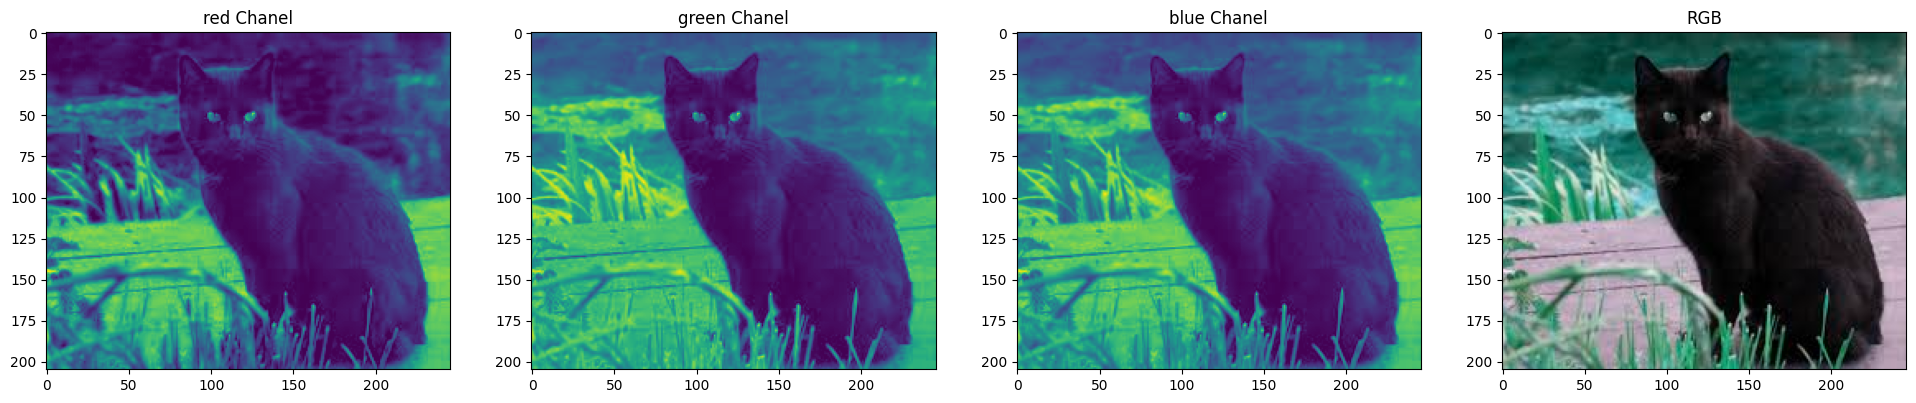

In [98]:
black_cat = np.array(cv2.imread("./images/black cat.jpeg") )

fig , ax = plt.subplots(1,4,figsize=(24,6))

labels = ["red","green","blue","RGB"]

for i in range(len(labels)):
  if(i<len(labels)-1):
      
    ax[i].imshow(black_cat[:,:,i])
    ax[i].set_title(f"{labels[i]} Chanel")
  else:
    ax[i].imshow(black_cat)
    ax[i].set_title("RGB")
    
    

plt.show()


<img src="https://i.makeagif.com/media/1-18-2023/4E4qFJ.gif" style="width:500; heigth:500" />

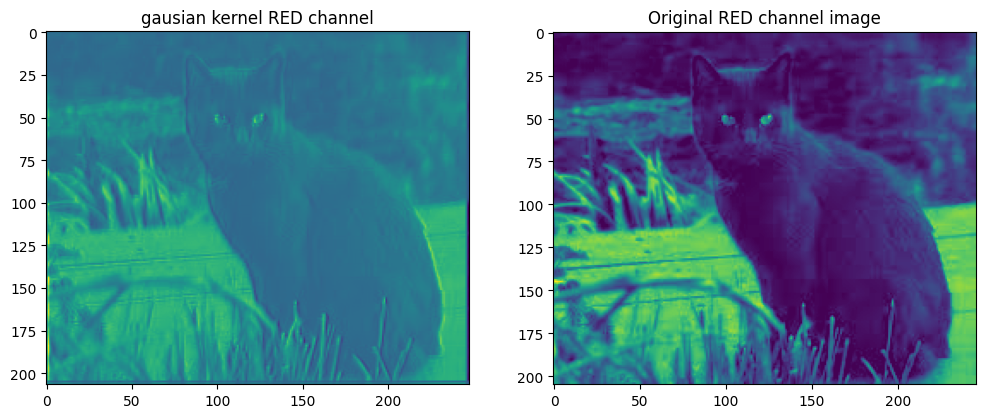

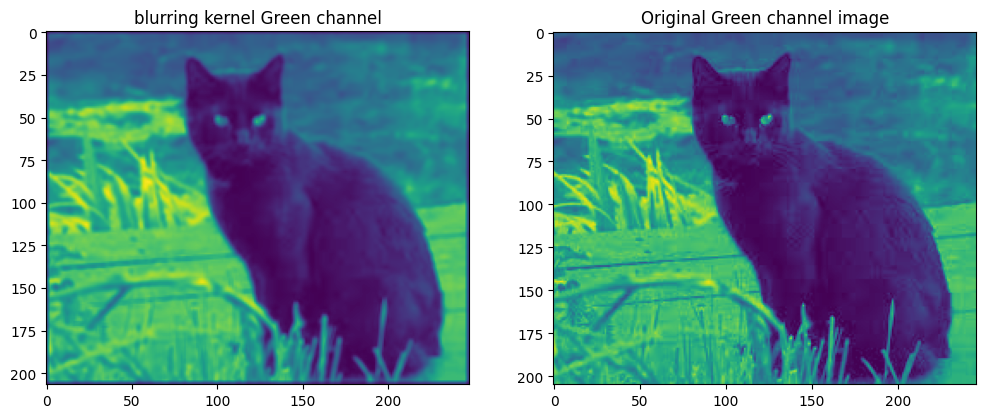

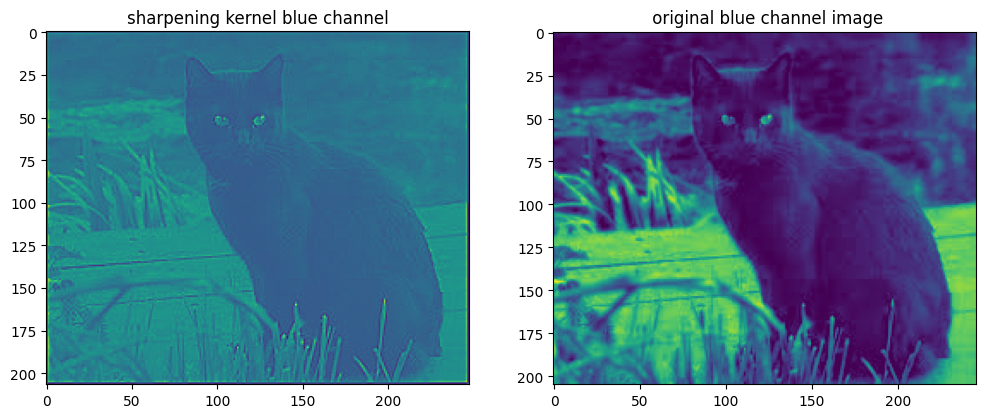

In [101]:
kernel = np.array(
    [
        
    [
        [(1/9),(1/9),(1/9)],
        [(1/9),(1/9),(1/9)],
        [(1/9),(1/9),(1/9)]
        
    ],
     [
        [(1/9),(1/9),(1/9)],
        [(1/9),(1/9),(1/9)],
        [(1/9),(1/9),(1/9)]
        
    ],
      [
        [(1/9),(1/9),(1/9)],
        [(1/9),(1/9),(1/9)],
        [(1/9),(1/9),(1/9)]
        
    ]
    
    ]  
)

sharpning_kernel = np.array(
    [
        [0,-1,0],
        [-1,5,-1],
        [0,-1,0]
    ]
)
## applying direct convolution to large arrays

image_red = fftconvolve(black_cat[:,:,0],np.random.randn(3,3)) 
fig , ax =fig , ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(image_red)
ax[0].set_title("gausian kernel RED channel")
ax[1].imshow(black_cat[:,:,0])
ax[1].set_title("Original RED channel image")
plt.show()


image_green = fftconvolve(black_cat[:,:,1],kernel[:,:,0])
fig , ax =fig , ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(image_green)
ax[0].set_title("blurring kernel Green channel")
ax[1].imshow(black_cat[:,:,1])
ax[1].set_title("Original Green channel image")
plt.show()

image_blue = fftconvolve(black_cat[:,:,2],sharpning_kernel)

fig , ax =fig , ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(image_blue)
ax[0].set_title("sharpening kernel blue channel")
ax[1].imshow(black_cat[:,:,0])
ax[1].set_title(" original blue channel image")
plt.show()





Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


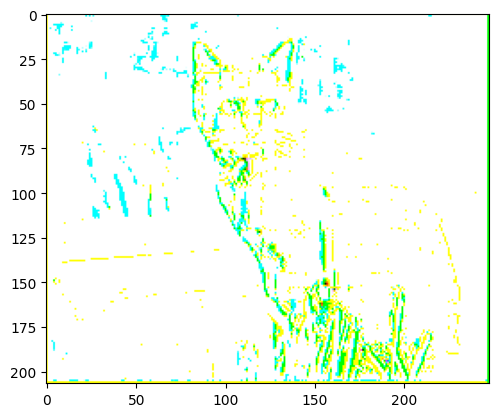

In [102]:
combined_channels = np.stack((image_red, image_green, image_blue),axis=-1)


plt.imshow(combined_channels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


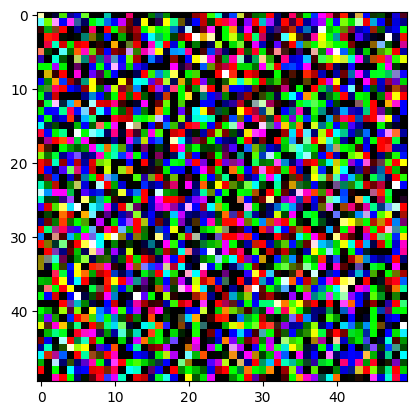

In [106]:
M = np.random.randn(50,50,3)

plt.imshow(M)